<a href="https://colab.research.google.com/github/IsabellaBonnet/analitica/blob/main/Reto_2_IBB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arboles de decisión
0. Cargar las librerias de referencia para el modelo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Graficador de cosas
from sklearn.tree import DecisionTreeClassifier

#Para no tener que cargar el archivo
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. se procede con la carga de los datos del archivo

In [ ]:
nxl='/content/drive/MyDrive/ACTUAL SEMESTRE/ANÁLITICA DE NEGOCIOS /2. BD1_Travel_Data_int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()
XDB.head(100)

#Se procede con la selección de las variables de trabajo
XD=np.array(XDB[['College1','FoodSpend','Income','TravelSpend']]) #datos entrada #Fixed typo: added closing parenthesis
yd=np.array(XDB['CreditCard1']) #datos salida, el dato que quiero que el modelo pronostique
print(yd)

[1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 

2. Creación del modelo-decision Tree

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4) #4 niveles o variables de entrada
mar.fit(XD,yd)
ypd=mar.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ypd)
print(cm)

#Eavaluamos el modelo
VN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
VP=cm[1][1]
Ex= (VN+VP)/(VN+VP+FN+FP) #que porcentaje de los datos pronosticó correctamente VN y VP es cuantos les pegó el modelo
print('La exactitud alcanzada por el modelo es:', Ex)
Se=VP/(FN+VP) #como le fue con los positivos
print('La sensibilidad alcanzada por el modelo es:', Se)
Es=VN/(VN+FP) #como le fue con los negativos
print('La especificidad alcanzada por el modelo es:', Es)

[[334   9]
 [ 42 115]]
La exactitud alcanzada por el modelo es: 0.898
La sensibilidad alcanzada por el modelo es: 0.732484076433121
La especificidad alcanzada por el modelo es: 0.9737609329446064


3. ¿Y dónde está el Árbol?

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

vs=['College1','FoodSpend','Income','TravelSpend'] #son los titulos para los nodos
dot_graph=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_graph)
graph.write_png('arbol.png')

True

4. se procede con el pronóstico de las personas con las siguientes características
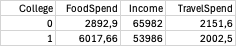

In [ ]:
XDB2=pd.read_excel(nxl,sheet_name=1)
XDB2=XDB2.dropna()
XDB2.head(100)
XD2=np.array(XDB2[['College','FoodSpend','Income','TravelSpend']])
print(XD2)


#pronosticamos la PreAprobación
ydp2=mar.predict(XD2)
print(ydp2)
print('El numero de personas que usarán:',np.sum(ydp2))
print('El numero de personas que no usarán:',len(ydp2)-np.sum(ydp2))
print('El numero de total de Datos es:',len(ydp2))

[[0.00000e+00 2.89290e+03 6.59820e+04 2.15160e+03]
 [1.00000e+00 6.01766e+03 5.39860e+04 2.00250e+03]]
[0 0]
El numero de personas que usarán: 0
El numero de personas que no usarán: 2
El numero de total de Datos es: 2


**Análisis de resultados**

De acuerdo con la base de datos suministrada, se puede observar un total de datos y el nodo base del arbol de decisión  se puede observar un total de 500 datos, divididos en 343 personas que harán uso de su tarjeta de crédito y un total de 157 personas que no lo harán, esto representa el 68,6% y el 31,4% respectivamente.

De acuerdo con el pronóstico realizado por el modelo, este alcanzó una exactitud cercana al 90%, estos valores no coinciden con la sensibilidad (73%) que mide el comportamiento del modelo frente a la clasificación de los que van a viajar con tarjeta de crédito, así como frente a la Especificidad (97%), indicador que mide el comportamiento del modelo frente a la clasificación de los que no viajarán con tarjeta de crédito.

Se destacan tres Nodos Puros
[108,0]
[0,47]
[1,0].


Con respecto al pronóstico, se puede observar un total de 2 individuos, de los cuales 0 individuosusarán tarjeta de crédito y un total 2 individuos, que no la usarán. Esto quiere decir que según las caracteristicas de los dos individuos mencionados, ninguno hara uso de tarjeta de crédito.

**Reto 2- Árboles de Decisión**

**Respuestas Word**

* **En el documento de Análisis en la Plataforma Google Colab, llevar a cabo la descripción de cada una de las variables que conforman el modelo.**
  Inicialmente, las variabes College y CreditCard estaban descritas con "yes" y "no". Es por esta que se convirtieron en variables categoricas con valores "0" y "1", donde "0" equivale a "no" y "1" equivale a "yes".
  Además se mencionan las variables numericas donde se describe el: ,'FoodSpend','Income','TravelSpend' de los individuos.

* **Determinar las métricas de exactitud general, sensibilidad, especificidad**
  * La **exactitud** alcanzada por el modelo es: 0.898
  * La **sensibilidad** alcanzada por el modelo es: 0.732484076433121
  * La **especificidad** alcanzada por el modelo es: 0.9737609329446064

* **De acuerdo con los nuevos clientes en la base de datos Travelan Score, Cuál es la probabilidad de que el primer cliente tenga planes de viajar el próximo año, y Cuá es la probabilidad para el segundo cliente.**
  * La probabilidad primer cliente es 100% que no viajará con tarjeta de crédito
  * La probabilidad del segundo cliente es 78,7% que no viajaá con tarjeta de crédito y del 21,3% que si viajará con tarjeta de crédito

* **¿Indicar cuáles son las reglas que poseen nodos puros?**
  Se destacan tres Nodos Puros
  * [108,0]
  * [0,47]
  * [1,0]

* **Determinar las reglas para los nuevos clientes.**
Si el resultado da un valor de "0", significa que no usará la tarjeta. Si da un valor de "1", significa que usará la tarjeta. En el caso de los individuos (2 personas en total)con las caracteristicas específicas, ninguno usará tarjeta, ya que ambos obtuvieron un valor de "0".

* **Indicar las reglas del negocio a las que pertenecen los dos individuos anteriores.**
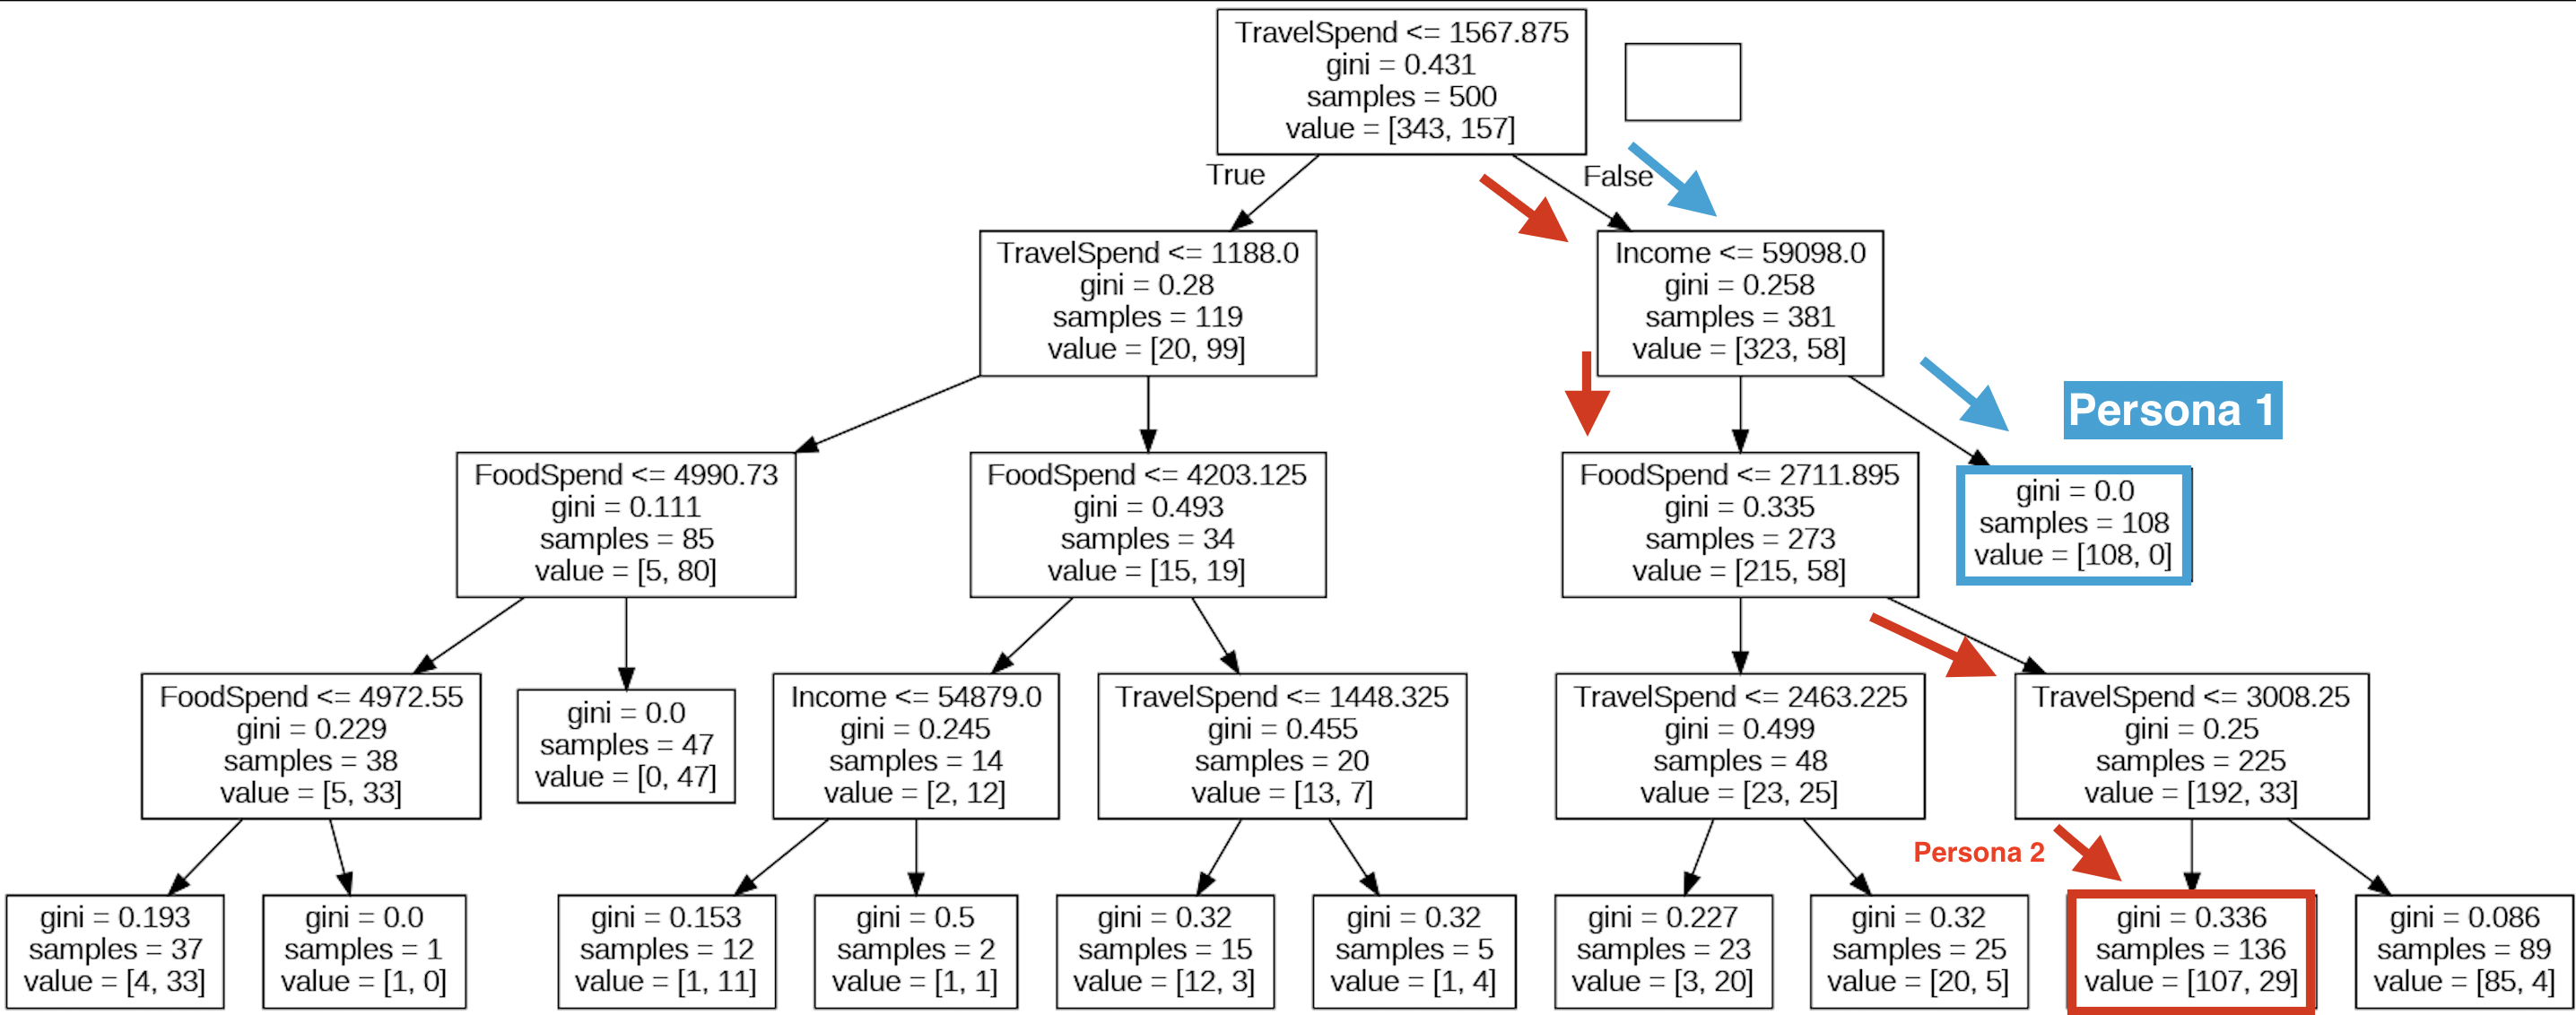

**Las reglas de negocio para el cliente 1 es:**
TravelSpend <= 1567.875, false, rama derecha
Income <= 59098.0, false, rama derecha

**Las reglas de negocio para el cliente 2:**
TravelSpend <= 1567.875, false, rama derecha
Income <= 59098.0, True, rama izquierda
FoodSpend <= 2711.895, false, rama derecha
TravelSpend <= 3008.25, true, rama izquierda